# Problem 2 : Emergence of the giant connected component


The goal of the section is to investigate the possible phase transition of the considered graphs with respect to the existence of a giant connected component. Three main questions remain : 
* Is there a phase transition ?
* If there is one,
    * at which threshold $\pi_c$ does it occurs ?
    * is it a continuous phase transition ?

The numerical results will be compared with theoretical ones. 

First we are going to need to determine the largest connected component in a graph : the networks module allow us to do it with the *connected_components( )* function. Let's try it ! 

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rdm
import numpy as np

In [68]:
# Exemple of determination of the size of the largest connected component -cc- for specific graphs

Gr = nx.Graph()
Gr.add_edges_from([(1, 2), (1, 3), (2, 4), (1,5)])
Gr.add_nodes_from(["ours", "lapin", "2"]) # the largest cc will be the one with the vertices as numbers

list(nx.connected_components(Gr))

[{1, 2, 3, 4, 5}, {'ours'}, {'lapin'}, {'2'}]

In [69]:
max(nx.connected_components(Gr),key=len) # we expect 1 2 3 4 5 as result

{1, 2, 3, 4, 5}

In [70]:
len(max(nx.connected_components(Gr),key=len)) # we expect 5 as result

5

Now let's dig in theoretical work to see what one can expect.

We call $q_d$ the probability to pick randomly an edge attached to a vertices of degree d : $$q_d = \dfrac{4\pi \delta_{4d} + (1-\pi)\delta_{1d}}{1+3\pi}$$
And $\Gamma$ the probability for an edge not to belonging to the giant connected component. 

Thus, $$ \Gamma = q_1 + q_2 \Gamma + q_3 \Gamma^2 + q_4 \Gamma^3 + \space...$$ 

which gives the equation for gamma to be solved as a function of $\pi$ : 
$$ \Gamma^3 - \dfrac{1+3\pi}{4\pi}\Gamma + \dfrac{1-\pi}{4\pi} = 0 $$

$\Gamma = 1$ is obviously a solution of this equation thus one can easily find the expansion : 

$$ \left( \Gamma-1 \right) \left( \Gamma - \dfrac{1-\sqrt{\pi}}{2\sqrt{\pi}} \right) \left( \Gamma + \dfrac{1+\sqrt{\pi}}{2\sqrt{\pi}} \right) = 0$$

And since $\Gamma$ is a probability the only solution reads $\Gamma(\pi) = \dfrac{1-\sqrt{\pi}}{2\sqrt{\pi}}$

Let us now focus on vertices only : we call $\beta$ the probability to belong to the giant connected component. $p_d$ is the probability for a given vertex to have a degree d : $p_d = \pi \delta_{4d} + (1-\pi)\delta_{1d}$.

Thus, 

$$1-\beta = p_1 \Gamma + p_2 \Gamma^2 + p_3 \Gamma^3 + p_4 \Gamma^4 + \space ...$$

which gives $\beta$ as a function of $\pi$ : 

$$
\begin{align}
\beta &= 1 - \dfrac{\left(1-\sqrt{\pi}\right)\left(1-\pi\right)}{2\sqrt{\pi}} - \dfrac{\left(1-\sqrt{\pi}\right)^4}{16\pi} \\
      &= \dfrac{-9\pi^2 + 12\pi^{3/2} + 18\pi -4\sqrt\pi -1}{16\pi}
\end{align}
$$

with the condition that the probability beta has to be positive and in [0,1] we find the critical value $\pi_c = \dfrac{1}{9}$. (There is here some calculation, setting $x=\sqrt\pi$ one can find a 4 degree polynom with "obvious" roots 1 and 1/3 and this gives the two possible solutions for $\pi$ with the only one in [0,1] being the true threshold)

In conclusion, we expect a phase transition between a system where no giant connected component exist for $\pi < \pi_c = \frac{1}{9}$ and one where the giant connected component exist. Also, one expect the diagram to look like the function $\beta$ with respect to $\pi$. 

Let's see what the numerical similation gives us. 

We are going to determine the size of the largest connected component in different instances of graphs -here the value is fixed at 100- (generated with the method see in section 1) and average those results to draw the phase diagram.


In [6]:
# Definition Degree Probability distribution
def degree(pi_p):
    if rdm.random() < (1-pi_p):
        return 1
    else:
        return 4

In [10]:
# definition of a function that will create the graph
def Graph(N_p,pi_p):
    c=False
    while c==False:
        K=[]
        for i in range(N_p):
            K.append(degree(pi_p)) #Creation of the list of all degrees
        if sum(K)%2 == 0:
            c=True
    
    Gr = nx.configuration_model(K)
    return Gr

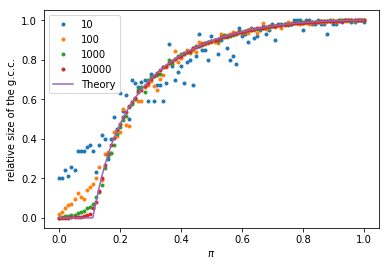

In [13]:
# Determination of the phase diagram 

n = 101 # number of points in the phase diagram (value of pi) 
L_N = [10,100,1000,10000] # number of vertices in the graphs

for N in L_N:
    S = [] # Relative size of the giant c.c.
    Pi = [] # keep track of the used pi values to plot the results
    
    for pi in [i/((n-1)) for i in range(n)]: # parameter of the degree distribution from [0,1] with step 1/n
        s=[] # size of the giant cc for different realization of the same algorithm
        Pi.append(pi)
        
        for q in range(10): # 100 realisations of the same algorithm to average the result
            G = Graph(N,pi)
            largest_cc = max(nx.connected_components(G), key=len)
            s.append(len(largest_cc))
            
        S.append((sum(s)/10)/N)
        
    plt.plot(Pi,S,'.',label=str(N))
plt.xlabel('$\pi$')
plt.ylabel('relative size of the g.c.c.')
plt.legend()
plt.savefig('Num_Phase_Diag.png')

beta = []
for pi in [i/((n-1)) for i in range(n)]:
    if pi < 1/9:
        beta.append(0)
    else:
        beta.append(1 - ((1-np.sqrt(pi))*(1-pi))/(2*np.sqrt(pi))-((1-np.sqrt(pi))**4)/(16*pi))
        
plt.plot(Pi,beta,label="Theory")
plt.legend()
plt.savefig('NumSim_Theory.png')
plt.show()

The results are drawn here : ![Phase_Diag](NumPhase_Diag.png)

One can make 3 comments : 
* as N grows all the numerical curves seem to approch a limit function
* as N grows the fluctuations decreases. This is coherent with the well know statement that the relative fluctuations of any short range process is decreasing as $\frac{1}{\sqrt N}$
* at low value of $\pi$ and near the supposed transition one can see the effect of finite size systems : we do not see a sharp transition at a threshold value $\pi_c$ but something smoother. 

Let's now compare it with the theoretical work close to the thermodynamical limit: ![NumSim_Theo](NumSim10000_Theory.png)

This seems to fit perfectly :
* the threshold value $\pi_c$ is numerically close to $\frac{1}{9}$ 
* the behavior of the curve (its derivative near $\pi_c$ and $\pi =1$) seem to confirm the theory.